In [11]:
import os,shutil
original_dataset_dir_female = '/home/wangtingshen/tingshen-code/female/'
original_dataset_dir_male = '/home/wangtingshen/tingshen-code/male/'

In [12]:
#保存较小的数据集
base_dir = '/home/wangtingshen/tingshen-code/real-dataset'

#拼接子路径，划分训练、验证、测试集
train_dir = os.path.join(base_dir,'train')
validation_dir = os.path.join(base_dir,'validation')
test_dir = os.path.join(base_dir,'test')

#训练女性图像目录
train_female_dir = os.path.join(train_dir,'female')
#训练男性图像目录
train_male_dir = os.path.join(train_dir,'male')
#验证女性图像目录
validation_female_dir = os.path.join(validation_dir,'female')
#验证男性图像目录
validation_male_dir = os.path.join(validation_dir,'male')
#测试女性图像目录
test_female_dir = os.path.join(test_dir,'female')
#测试男性图像目录
test_male_dir = os.path.join(test_dir,'male')

print('total training female images:',len(os.listdir(train_female_dir)))
print('total training male images:',len(os.listdir(train_male_dir)))
print('total validation female images:',len(os.listdir(validation_female_dir)))
print('total validation male images:',len(os.listdir(validation_male_dir)))
print('total test female images:',len(os.listdir(test_female_dir)))
print('total test male images:',len(os.listdir(test_male_dir)))

total training female images: 70000
total training male images: 70000
total validation female images: 5000
total validation male images: 5000
total test female images: 5000
total test male images: 5000


In [13]:
from keras import models
from keras import layers

Using TensorFlow backend.


In [20]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

#默认打乱数据
train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(224,224),
        batch_size=35,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(224,224),
        batch_size=35,
        class_mode='binary')

Found 140000 images belonging to 2 classes.
Found 10000 images belonging to 2 classes.


In [21]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (35, 224, 224, 3)
labels batch shape: (35,)


In [27]:
import keras
from keras.applications.vgg19 import VGG19
from keras.models import Sequential
from keras.layers import Dense,Activation,Dropout,Flatten
from keras.layers import Conv2D,MaxPool2D
from keras.utils import plot_model

# 定义输入
input_shape = (224,224,3) # RGB影像224x224（height,width,channel)
#引用模型
conv_base = VGG19(weights=None, include_top=False, pooling=None,input_shape=input_shape)
#定义模型
model = models.Sequential()
# 前馈全连接区块
model.add(conv_base)
model.add(Flatten(name='flatten'))
model.add(Dense(4096,activation='relu',name='fc1'))
model.add(Dense(4096,activation='relu',name='fc2'))
model.add(Dense(1,activation='sigmoid',name='predictions'))

In [28]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg19 (Model)                (None, 7, 7, 512)         20024384  
_________________________________________________________________
flatten (Flatten)            (None, 25088)             0         
_________________________________________________________________
fc1 (Dense)                  (None, 4096)              102764544 
_________________________________________________________________
fc2 (Dense)                  (None, 4096)              16781312  
_________________________________________________________________
predictions (Dense)          (None, 1)                 4097      
Total params: 139,574,337
Trainable params: 139,574,337
Non-trainable params: 0
_________________________________________________________________


In [29]:
from keras import optimizers
from keras.callbacks import LearningRateScheduler
import math

def step_decay(epoch):
    initial_lr = 1e-4
    drop = 0.1
    epochs_drop = 15.0
    lrate = initial_lr*math.pow(drop,math.floor((1+epoch)/epochs_drop))
    return lrate

learning_rate = LearningRateScheduler(step_decay)
model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])

In [30]:
history = model.fit_generator(
        train_generator,
        steps_per_epoch=2000, #每个step表示1个batch_size的数据大小
        epochs=75,
        validation_data=validation_generator,
        callbacks=[learning_rate],
        validation_steps=50)

Epoch 1/75
2000/2000 [==============================] - 838s 419ms/step - loss: 0.3382 - acc: 0.8252 - val_loss: 0.0655 - val_acc: 0.9503
Epoch 2/75
2000/2000 [==============================] - 849s 425ms/step - loss: 0.1318 - acc: 0.9522 - val_loss: 0.0522 - val_acc: 0.9611
Epoch 3/75
2000/2000 [==============================] - 605s 303ms/step - loss: 0.1070 - acc: 0.9633 - val_loss: 0.1403 - val_acc: 0.9640
Epoch 4/75
2000/2000 [==============================] - 611s 305ms/step - loss: 0.3806 - acc: 0.9653 - val_loss: 0.0023 - val_acc: 0.9680
Epoch 5/75
2000/2000 [==============================] - 598s 299ms/step - loss: 0.1106 - acc: 0.9692 - val_loss: 0.1356 - val_acc: 0.9543
Epoch 6/75
2000/2000 [==============================] - 592s 296ms/step - loss: 0.0974 - acc: 0.9706 - val_loss: 0.0361 - val_acc: 0.9724
Epoch 7/75
2000/2000 [==============================] - 595s 298ms/step - loss: 0.0988 - acc: 0.9718 - val_loss: 0.0584 - val_acc: 0.9646
Epoch 8/75
2000/2000 [============

Epoch 60/75
2000/2000 [==============================] - 577s 288ms/step - loss: 0.0229 - acc: 0.9945 - val_loss: 0.0809 - val_acc: 0.9777
Epoch 61/75
2000/2000 [==============================] - 577s 289ms/step - loss: 0.0196 - acc: 0.9944 - val_loss: 0.1309 - val_acc: 0.9823
Epoch 62/75
2000/2000 [==============================] - 577s 288ms/step - loss: 0.0232 - acc: 0.9944 - val_loss: 0.0076 - val_acc: 0.9749
Epoch 63/75
2000/2000 [==============================] - 577s 288ms/step - loss: 0.0195 - acc: 0.9944 - val_loss: 0.1308 - val_acc: 0.9799
Epoch 64/75
2000/2000 [==============================] - 577s 288ms/step - loss: 0.0232 - acc: 0.9944 - val_loss: 0.0545 - val_acc: 0.9806
Epoch 65/75
2000/2000 [==============================] - 577s 289ms/step - loss: 0.0228 - acc: 0.9945 - val_loss: 0.0016 - val_acc: 0.9811
Epoch 66/75
2000/2000 [==============================] - 577s 289ms/step - loss: 0.0197 - acc: 0.9943 - val_loss: 0.0951 - val_acc: 0.9760
Epoch 67/75
2000/2000 [====

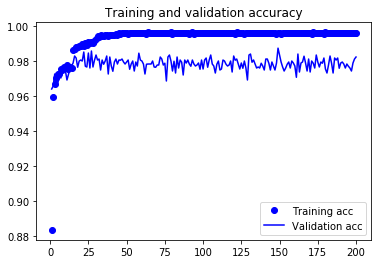

In [30]:
import matplotlib.pyplot as plt
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

acc = history.history['acc']
val_acc =  history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.show()

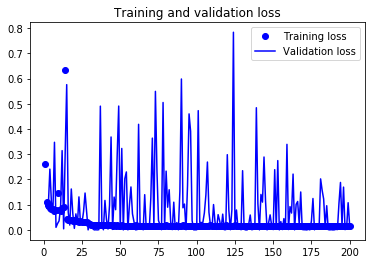

In [31]:
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()